# Fertility in Developed and Developing Countries
---

### Introduction

In this project we will compare the fertility in developed vs developing countries. Using UN data we aim to draw conclusions based on a country's development and their fertility, contraceptive use, and infant survival rates. This will allow for an understanding of how human development may influence a society's perspective on sex and birth.

---
 

# Question 1: How do fertility rates differ in developed vs developing countries? (Aidan)

### Importing and Cleaning Fertility Data

In [196]:
# Dependencies
import time
import hvplot.pandas
import csv
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import geoviews as gv
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr, f_oneway
import scipy.stats as st
from sklearn import datasets

In [197]:
# Read in data
fertility_df = pd.read_excel('data/fertility.xlsx')

# Clean up data
fertility_df = fertility_df.iloc[1:]

# Renaming for readability
fertility_df.rename(columns={'Reference': 'Year'}, inplace=True)
fertility_df.rename(columns={'Age-specific fertility rates': 'Age: 15-19'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 7': 'Fertility at age: 20-24'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 8': 'Fertility at age: 25-29'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 9': 'Fertility at age: 30-34'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 10': 'Fertility at age: 35-39'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 11': 'Fertility at age: 40-44'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 12': 'Fertility at age: 45-49'}, inplace=True)

# Drop uneccessary columns
fertility_df.drop(columns=['Unnamed: 4'], inplace=True)
fertility_df.drop(columns=['Source type'], inplace=True)
fertility_df.drop(columns=['Source'], inplace=True)
fertility_df.drop(columns=['Survey name'], inplace=True)
fertility_df.drop(columns=['Note on country or population'], inplace=True)
fertility_df.drop(columns=['Note on age'], inplace=True)
fertility_df.drop(columns=['Note on methods'], inplace=True)
fertility_df.drop(columns=['Note on population data used in denominator'], inplace=True)

# Write to csv
fertility_df.to_csv('data/fertility_clean.csv', index=False)

# Show dataframe
fertility_df


,Country,ISO code,Period,Reference,Total fertility,Age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Mean age at childbearing
1,Afghanistan,4.0,Around 1970,1973,8.21,168,359,355,307,235,137,81,30
2,Afghanistan,4.0,..,1979,7.11,105,260,309,301,262,185,..,30.7
3,Afghanistan,4.0,Around 2005,2003,7.52,146,333,350,289,217,143,..,30.1
4,Afghanistan,4.0,Latest,2009,5.11,80,257,262,209,128,60,26,29.1
5,Albania,8.0,Around 1970,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zimbabwe,716.0,Around 1970,1969,6.74,79,272,304,257,218,145,73,31.2
1070,Zimbabwe,716.0,Around 1985,1987,5.42,102,251,250,212,158,80,32,29.5
1071,Zimbabwe,716.0,Around 1995,1998,3.98,112,199,180,135,108,46,15,28.3
1072,Zimbabwe,716.0,Around 2005,2004,3.8,99,205,172,144,86,42,13,28.1


### Importing and Cleaning GDP (Development) Data

In [198]:
# Read in XML data
tree = ET.parse('data/gdp_per_capita.xml')
root = tree.getroot()

# Iterate through and add xml records
data = []

for record in root.findall('.//record'):
    record_data = {}
    for field in record.findall('field'):
        name = field.get('name')
        value = field.text if field.text else None
        record_data[name] = value
    data.append(record_data)

# Create DataFrame from data
gdp_pc_df = pd.DataFrame(data)

# Clean up data
gdp_pc_df.drop(columns=['Value Footnotes'], inplace=True)

# Remove non-country areas
gdp_pc_df.rename(columns={'Country or Area': 'Country'}, inplace=True)
gdp_pc_df = gdp_pc_df[~gdp_pc_df['Country'].isin([
    'Africa Eastern and Southern', 'Africa Western and Central', "Arab World", 
    "Caribbean small states", "Central Europe and the Baltics", "Early-demographic dividend", 
    "East Asia & Pacific", "East Asia & Pacific (excluding high income)", 
    "East Asia & Pacific (IDA & IBRD)", "Europe & Central Asia", 
    "Europe & Central Asia (excluding high income)", "Euro area", 
    "Europe & Central Asia (IDA & IBRD)", "European Union", 
    "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", 
    "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", 
    "IDA total", "Late-demographic dividend", "Latin America & Caribbean", 
    "Latin America & Caribbean (excluding high income)", 
    "Latin America & Caribbean (IDA & IBRD)", "Least developed countries: UN classification", 
    "Low & middle income", "Low income", "Lower middle income", 
    "Middle East & North Africa", "Middle East & North Africa (excluding high income)", 
    "Middle East & North Africa (IDA & IBRD)", "Middle income", 
    "North America", "OECD members", "Other small states", 
    "Pacific island small states", "Post-demographic dividend", 
    "Pre-demographic dividend", "Small states", "South Asia", 
    "South Asia (IDA & IBRD)", "Sub-Saharan Africa", 
    "Sub-Saharan Africa (excluding high income)", "Sub-Saharan Africa (IDA & IBRD)", 
    "Upper middle income", "World"])]

# Get development status (> or < 12000 USD)
gdp_pc_df['Value'] = pd.to_numeric(gdp_pc_df['Value'], errors='coerce')
gdp_pc_df['Development'] = gdp_pc_df['Value'].apply(lambda x: 'Developed' if x > 12000 else 'Developing')

# Sort the DataFrame by Country and Year
gdp_pc_df = gdp_pc_df.sort_values(by=['Country', 'Year'])

# Find best year for each country (2012 oreferred, else under 2012, then if need be over 2012)
gdp_pc_df['Year'] = pd.to_numeric(gdp_pc_df['Year'], errors='coerce')
df_pre_2012 = gdp_pc_df[gdp_pc_df['Year'] <= 2012].sort_values(by=['Country', 'Year'], ascending=[True, False])
df_post_2012 = gdp_pc_df[gdp_pc_df['Year'] > 2012].sort_values(by=['Country', 'Year'], ascending=[True, True])
df_pre_2012_closest = df_pre_2012.groupby('Country').first().reset_index()
df_post_2012_closest = df_post_2012[~df_post_2012['Country'].isin(df_pre_2012_closest['Country'])].groupby('Country').first().reset_index()
gdp_pc_df = pd.concat([df_pre_2012_closest, df_post_2012_closest], ignore_index=True)


# Write to CSV
gdp_pc_df.to_csv('data/gdp_clean.csv', index=False)

gdp_pc_df



,Country,Year,Value,Development
0,Afghanistan,2012,1958.447627,Developing
1,Albania,2012,10526.250106,Developing
2,Algeria,2012,13347.362795,Developed
3,Angola,2012,7389.314960,Developing
4,Antigua and Barbuda,2012,20208.939288,Developed
...,...,...,...,...
193,Yemen,2012,3258.192678,Developing
194,Zambia,2012,3357.738371,Developing
195,Zimbabwe,2012,2349.028207,Developing
196,Djibouti,2013,3730.366512,Developing


### Merging Fertility and Development Data

In [199]:
# Get average fertility in each country
fertility_df['Total fertility'] = pd.to_numeric(fertility_df['Total fertility'], errors='coerce')
avg_fertility_df = fertility_df.groupby(['Country'], as_index=False).agg({'Total fertility': 'mean'})

# Match names for merging
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Czech Republic', 'Czechia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Democratic Republic of the Congo', 'Congo DRC')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Iran (Islamic Republic of)', 'Iran')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Lao People\'s Democratic Republic', 'Laos')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('The former Yugoslav Republic of Macedonia', 'North Macedonia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Russian Federation', 'Russia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Swaziland', 'Eswatini')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Republic of Korea', 'South Korea')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('United Republic of Tanzania', 'Tanzania')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('United States of America', 'United States')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Viet Nam', 'Vietnam')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('The Bahamas', 'Bahamas')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('CÃ´te d\'Ivoire', 'Côte d\'Ivoire')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Dem. Rep. Congo', 'Congo DRC')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('The Gambia', 'Gambia')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Kyrgyz Republic', 'Kyrgyzstan')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Lao PDR', 'Laos')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('St. Kitts and Nevis', 'Saint Kitts and Nevis')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('St. Lucia', 'Saint Lucia')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Slovak Republic', 'Slovakia')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Korea', 'South Korea')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('TÃ¼rkiye', 'Turkey')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Viet Nam', 'Vietnam')

# Merge with GDP
gdp_fertility_df = pd.merge(avg_fertility_df, gdp_pc_df, on="Country", how="inner")
gdp_fertility_df.rename(columns={'Total fertility': 'Fertility'}, inplace=True)

gdp_fertility_df


,Country,Fertility,Year,Value,Development
0,Afghanistan,6.9875,2012,1958.447627,Developing
1,Albania,2.8580,2012,10526.250106,Developing
2,Algeria,4.5420,2012,13347.362795,Developed
3,Angola,6.4400,2012,7389.314960,Developing
4,Antigua and Barbuda,2.2220,2012,20208.939288,Developed
...,...,...,...,...,...
182,Venezuela,3.4800,2011,17402.275659,Developed
183,Vietnam,3.4240,2012,6364.978023,Developing
184,Yemen,6.7980,2012,3258.192678,Developing
185,Zambia,6.2440,2012,3357.738371,Developing


### Importing and cleaning Country Centroid Coordinate Data

In [200]:
# Read in country data
countries_df = pd.read_csv('data/countries.csv')

# Clean the data
countries_df.rename(columns={'COUNTRY': 'Country'}, inplace=True)
countries_df.drop(columns=['ISO'], inplace=True)
countries_df.drop(columns=['COUNTRYAFF'], inplace=True)
countries_df.drop(columns=['AFF_ISO'], inplace=True)
countries_df['Country'] = countries_df['Country'].replace('Czech Republic', 'Czechia')
countries_df['Country'] = countries_df['Country'].replace('Russian Federation', 'Russia')

#countries_df
# Merge with GDP
gdp_fertility_df = pd.merge(gdp_fertility_df, countries_df, on="Country", how="inner")

# Write to csv
gdp_fertility_df.to_csv('data/dev_fert_latlng.csv', index=False)

gdp_fertility_df

,Country,Fertility,Year,Value,Development,longitude,latitude
0,Afghanistan,6.9875,2012,1958.447627,Developing,66.592161,34.134026
1,Albania,2.8580,2012,10526.250106,Developing,20.061083,41.141659
2,Algeria,4.5420,2012,13347.362795,Developed,2.655846,28.350970
3,Angola,6.4400,2012,7389.314960,Developing,17.651769,-12.167424
4,Antigua and Barbuda,2.2220,2012,20208.939288,Developed,-61.785308,17.071468
...,...,...,...,...,...,...,...
182,Venezuela,3.4800,2011,17402.275659,Developed,-66.364921,7.148325
183,Vietnam,3.4240,2012,6364.978023,Developing,105.913388,16.517347
184,Yemen,6.7980,2012,3258.192678,Developing,47.468158,16.001393
185,Zambia,6.2440,2012,3357.738371,Developing,27.755214,-13.162833


## Map of Fertility in Developed and Developing Countries
 

In [201]:
# Multiply Fertility by 100 to control marker size
gdp_fertility_df['Fertility_Size'] = gdp_fertility_df['Fertility'] * 10

# Map coloring
color_map = {
    'Developed': 'blue',
    'Developing': 'orange'
}

# Configure the map plot
tiles = gv.tile_sources.OSM()

map_plot = tiles * gdp_fertility_df.hvplot.points(
    'longitude', 'latitude',
    geo=True,
    size='Fertility_Size',
    color=gdp_fertility_df['Development'].map(color_map),
    title='Fertility in Developed and Developing Countries',
    hover_cols=['Country', 'Development', 'Fertility'],
    frame_height=400,
    frame_width=600
)

# Display the map
map_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (_color,Fertility_Size,Country,Development,Fertility)

## Satter Plot of Fertility in Developed and Developing Countries
 

In [202]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x, y, x_label, y_label, title, development="Developed"):
    if(development == "Developed"):
        s_color = "blue"
    elif(development == "Developing"):
        s_color = "orange"
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_values = slope * x + intercept

    # make plot and line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color=s_color, edgecolor='black', linewidths=1, marker='o', alpha=0.75)
    plt.plot(x, regress_values, color="red", label=f"Linear Reg (slope={slope:.2f})")
    
    # Incorporate the other graph properties
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True)
    plt.show()

# Get only developed
deved_df = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developed']

# Get only developing
not_deved_df = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developing']


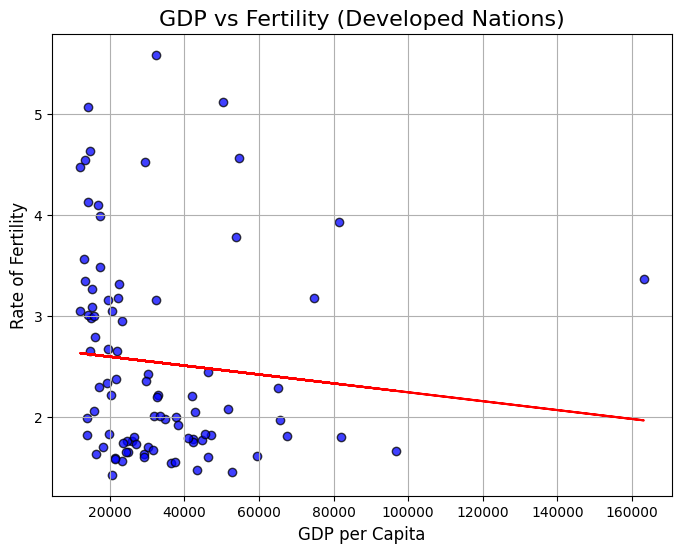

In [203]:
plot_lin_reg(deved_df["Value"], deved_df["Fertility"], "GDP per Capita", "Rate of Fertility", "GDP vs Fertility (Developed Nations)", "Developed")

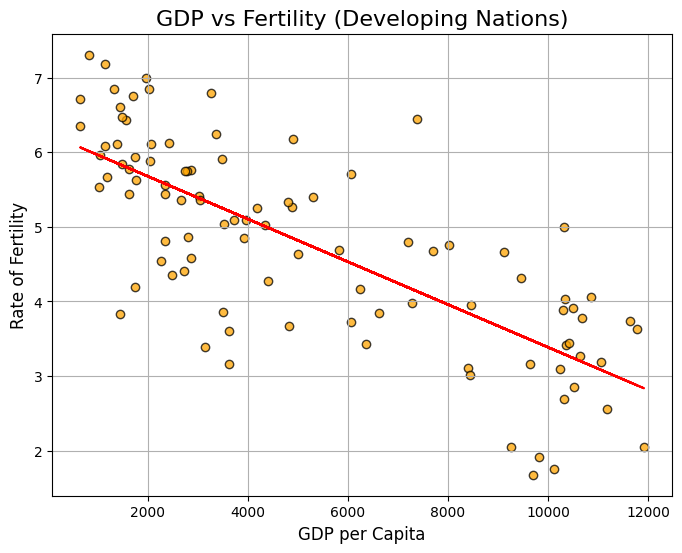

In [204]:
plot_lin_reg(not_deved_df["Value"], not_deved_df["Fertility"], "GDP per Capita", "Rate of Fertility", "GDP vs Fertility (Developing Nations)", "Developing")

Pearson Correlation: -0.5371
P-value: 0.0000000000000023


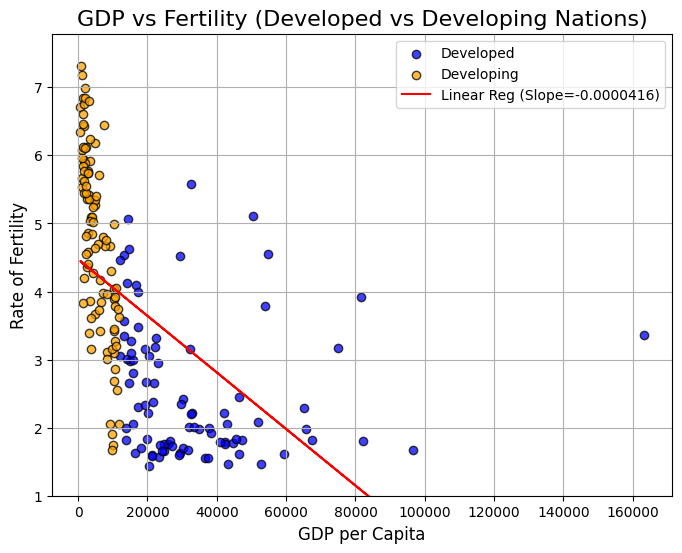

In [205]:
# Perform linear regression
slope, intercept, _, _, _ = linregress(gdp_fertility_df["Value"], gdp_fertility_df["Fertility"])
regress_values = slope * gdp_fertility_df["Value"] + intercept

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(gdp_fertility_df["Value"], gdp_fertility_df["Fertility"])
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.16f}")

# Make plot and line
plt.figure(figsize=(8, 6))
    
# Scatter for developed (blue)
developed = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developed']
plt.scatter(developed["Value"], developed["Fertility"], color="blue", edgecolor='black', 
linewidths=1, marker='o', alpha=0.75, label='Developed')
    
# Scatter for developing (orange)
developing = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developing']
plt.scatter(developing["Value"], developing["Fertility"], color="orange", edgecolor='black', 
            linewidths=1, marker='o', alpha=0.75, label='Developing')
    
plt.plot(gdp_fertility_df["Value"], regress_values, color="red", label=f"Linear Reg (Slope={slope:.7f})")
    
# Incorporate the other graph properties
plt.ylim(1)
plt.title("GDP vs Fertility (Developed vs Developing Nations)", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Rate of Fertility", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# 
---

### How do fertility rates differ in developed vs developing countries? - Analysis

There is a clear correlation in both developed and developing countries where there is an increase in GDP per Capita, you see a decrease in the rate of fertility. That is to say, in general, that citizens of more developed and wealthy countries tend to have fewer children than citizens of less developed and less wealthy countries. The difference in fertility is most apparent amongst developing countries. Countries with GDP per capitas near the development boundary of $12,000 USD, have fertility rates (~2 to 4) dramatically lower than those at the very bottom of the global GDP valuations (~5 to 7). The Pearson correlation value (-0.5371), as well as the P-value (0.0000000000000023), both demonstrate a clear negative correlation between fertility and GDP per capita (development).

---
 

# Question 2: How prevalent are contraceptives in developed vs developing countries? (Saba)

Importing and Cleaning Contraceptive Data

In [206]:
#Read in excel data
contraceptive_df = pd.read_excel('data/cc_by_methods.xlsx')

In [207]:
# Create DataFrame from data
cc_df = pd.DataFrame(contraceptive_df)

In [208]:
cc_df.head()

,Country or area,ISO code,Survey\nstart year,Survey\nend year,Age group,Any method,Any modern method,Female\nsterilization,Male\nsterilization,IUD,...,Note on country,Note on data,Note on population,Contraceptive use: methods,Contraceptive use: residuals (modern methods),Contraceptive use: residuals (traditional methods),Unmet need: population included,Unmet need: population excluded,Unmet need: indicator,Unnamed: 39
0,Afghanistan,4,1972,1974,15-44,1.6,1.6,..,..,0.4,...,..,..,Data pertain to ever-married women of reproduc...,..,..,..,..,..,..,
1,Afghanistan,4,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,...,"Data pertain to Nangarhar, Konar and Laghman, ...",..,..,Figures by method do not add up to the total. ...,..,..,..,..,..,
2,Afghanistan,4,2003,2003,<50,10.3,8.7,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
3,Afghanistan,4,2005,2005,<50,13.6,12.5,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
4,Afghanistan,4,2006,2006,10-49,18.6,17.5,0.7,..,1,...,"Excluding the six largest cities (Kabul, Hirat...",..,..,Figures by method do not add up to the total.,..,..,..,..,..,


In [209]:
# Clean up data
cc_df = cc_df.iloc[1:]

# Renaming for readability
cc_df.rename(columns={'Survey\nstart year' : 'Survey Start Year'}, inplace=True)
cc_df.rename(columns={'Survey\nend year' : 'Survey End Year'}, inplace=True)
cc_df.rename(columns={'Any method' : 'Any method %'}, inplace=True)
cc_df.rename(columns={'Any modern method' : 'Any modern method %'}, inplace=True)
cc_df.rename(columns={'Female\nsterilization' : 'Female Sterilization %'}, inplace=True)
cc_df.rename(columns={'Male\nsterilization' : 'Male Sterilization %'}, inplace=True)
cc_df.rename(columns={'IUD' : 'IUD %'}, inplace=True)
cc_df.rename(columns={'Implant' : 'Implant %'}, inplace=True)
cc_df.rename(columns={'Injectable' : 'Injectable %'}, inplace=True)
cc_df.rename(columns={'Pill' : 'Pill %'}, inplace=True)
cc_df.rename(columns={'Male condom' : 'Male condom %'}, inplace=True)
cc_df.rename(columns={'Female condom' : 'Female condom %'}, inplace=True)
cc_df.rename(columns={'Vaginal barrier methods' : 'Vaginal barrier methods %'}, inplace=True)
cc_df.rename(columns={'Lactational amenorrhea method (LAM)' : 'Lactational amenorrhea method (LAM) %'}, inplace=True)
cc_df.rename(columns={'Emergency contraception' : 'Emergency contraception %'}, inplace=True)
cc_df.rename(columns={'Other modern methods' : 'Other modern methods %'}, inplace=True)
cc_df.rename(columns={'Any traditional method' : 'Any traditional method %'}, inplace=True)
cc_df.rename(columns={'Rhythm' : 'Rhythm %'}, inplace=True)
cc_df.rename(columns={'Withdrawal' : 'Withdrawal %'}, inplace=True)
cc_df.rename(columns={'Other traditional methods' : 'Other traditional methods %'}, inplace=True)
cc_df.rename(columns={'	Country or area' : 'Country'}, inplace=True)


In [210]:
cc_df.head()

,Country or area,ISO code,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,...,Note on country,Note on data,Note on population,Contraceptive use: methods,Contraceptive use: residuals (modern methods),Contraceptive use: residuals (traditional methods),Unmet need: population included,Unmet need: population excluded,Unmet need: indicator,Unnamed: 39
1,Afghanistan,4,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,...,"Data pertain to Nangarhar, Konar and Laghman, ...",..,..,Figures by method do not add up to the total. ...,..,..,..,..,..,
2,Afghanistan,4,2003,2003,<50,10.3,8.7,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
3,Afghanistan,4,2005,2005,<50,13.6,12.5,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
4,Afghanistan,4,2006,2006,10-49,18.6,17.5,0.7,..,1,...,"Excluding the six largest cities (Kabul, Hirat...",..,..,Figures by method do not add up to the total.,..,..,..,..,..,
5,Afghanistan,4,2007,2008,15-49,22.8,15.2,..,..,..,...,..,..,..,..,..,..,..,..,..,


In [211]:
#read the columns
for i in cc_df.columns:
    print (i)

Country or area
ISO code
Survey Start Year
Survey End Year
Age group
Any method %
Any modern method %
Female Sterilization %
Male Sterilization %
IUD %
Implant %
Injectable %
Pill %
Male condom %
Female condom %
Vaginal barrier methods %
Lactational amenorrhea method (LAM) %
Emergency contraception %
Other modern methods %
Any traditional method %
Rhythm %
Withdrawal %
Other traditional methods %
Unmet need total
Unmet need spacing
Unmet need limiting
Source
DataCatalog ID
DataCatalog LongName
DataCatalog ShortName
Note on country
Note on data
Note on population
Contraceptive use: methods
Contraceptive use: residuals  (modern methods)
Contraceptive use: residuals  (traditional methods)
Unmet need: population included
Unmet need: population excluded
Unmet need: indicator
Unnamed: 39


In [212]:
#cleaning the data and dropping extra columns
cc_clean_df = cc_df.drop(columns=["Unmet need total", "Unmet need spacing", "Unmet need limiting",
"DataCatalog ID",
"DataCatalog LongName",
"DataCatalog ShortName",
"Note on country",
"Note on data",
"Note on population",
"Contraceptive use: methods",
"Contraceptive use: residuals  (modern methods)",
"Contraceptive use: residuals  (traditional methods)",
"Unmet need: population included",
"Unmet need: population excluded",
"Unmet need: indicator",
"Unnamed: 39", "Source", "Rhythm %", "Withdrawal %", "Other traditional methods %", "Lactational amenorrhea method (LAM) %",
"Any traditional method %", "ISO code", "Other modern methods %", "Emergency contraception %", "Vaginal barrier methods %"
])

In [213]:
# Show Dataframe
cc_clean_df.head()

,Country or area,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %
1,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..
2,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..
3,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..
4,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..
5,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..


In [214]:
#checking remaining columns
for i in cc_clean_df.columns:
    print (i)

Country or area
Survey Start Year
Survey End Year
Age group
Any method %
Any modern method %
Female Sterilization %
Male Sterilization %
IUD %
Implant %
Injectable %
Pill %
Male condom %
Female condom %


In [215]:
# Write to csv
cc_clean_df.to_csv('data/contraceptive_clean.csv', index=False)

In [216]:
# Show dataframe
cc_clean_df.head()

,Country or area,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %
1,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..
2,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..
3,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..
4,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..
5,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..


Importing clean GDP (Development) data in order to add them to my data frame as an index to catagorize countries 

In [217]:
#Importing and Cleaning GDP (Development) Data

In [218]:
#reading the clean csv file
gdp_df=pd.read_csv('data/gdp_clean.csv')

In [219]:
#showing the data frame
gdp_df.head()

,Country,Year,Value,Development
0,Afghanistan,2012,1958.447627,Developing
1,Albania,2012,10526.250106,Developing
2,Algeria,2012,13347.362795,Developed
3,Angola,2012,7389.314960,Developing
4,Antigua and Barbuda,2012,20208.939288,Developed


In [220]:
#Renaming columns for merging
cc_clean_df=cc_clean_df.rename(columns={"Country or area": "Country"})

In [221]:
cc_clean_df.head()

,Country,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %
1,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..
2,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..
3,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..
4,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..
5,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..


In [222]:
#merging the clean contraceptive data frame and clean gdp data frame into one data frame
merged_df=pd.merge(cc_clean_df, gdp_df, on="Country")
merged_clean_df=merged_df.copy()

In [223]:
merged_clean_df.head()

,Country,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Year,Value,Development
0,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..,2012,1958.447627,Developing
1,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..,2012,1958.447627,Developing
2,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..,2012,1958.447627,Developing
3,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..,2012,1958.447627,Developing
4,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..,2012,1958.447627,Developing


In [224]:
#Cleaning the data value columns (dropping all rows which have "..")
merged_clean_df = merged_clean_df.loc[merged_clean_df["Any method %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Any modern method %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Female Sterilization %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Male Sterilization %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["IUD %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Implant %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Injectable %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Pill %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Male condom %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Female condom %"]!="..",:]

dropping "Year", "Value" and "Age group" columns, because I want to analysis the precentage of each contraceptive methode used in developing and developed countries.

In [225]:
#dropping "Year", "Value", "Age group" columns
merged_clean_df = merged_clean_df.drop(columns=["Year", "Value", "Age group"])

In [226]:
merged_clean_df.head()

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46,3.7,1,0,0.3,0,0.2,0.6,1.4,0,Developing
22,Algeria,2012,2013,57.1,49.5,0.5,0,2.2,0.2,0.1,43,1.9,0,Developed
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0,39,2.1,0,Developed
25,Angola,2001,2001,6.3,4.9,0.1,0,0.4,0,1.4,2.2,0.3,0.1,Developing


I have sorted the data frame based on the last "Survey End Year", in order to have the most updated values

In [227]:
#sorting the data frame based on the last "Survey End Year"
merged_clean_df = merged_clean_df.sort_values(by=["Country", "Survey End Year"], ascending=[True, False])
merged_clean_df = merged_clean_df.drop_duplicates(subset="Country", keep="first")

In [228]:
#cheking datas for not having repetitive countries
merged_clean_df["Country"].values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
       'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji', 'Georgia',
       'Ghana', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Indonesia',
       'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo',
       'Lebanon', 'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'North Macedonia', 'Panama', 'Papua New Guinea', 'Peru', 'Qatar',
       'Rwanda', 'Samoa', 'Saudi Arabia', 'Serbia', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'South Sudan', 'Sri L

In [229]:
merged_clean_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46,3.7,1,0,0.3,0,0.2,0.6,1.4,0,Developing
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0,39,2.1,0,Developed
25,Angola,2001,2001,6.3,4.9,0.1,0,0.4,0,1.4,2.2,0.3,0.1,Developing
38,Argentina,2019,2020,70.1,68.2,15.7,0.2,7.5,2.9,4.1,23.2,12.4,0.4,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Uzbekistan,2021,2022,58.8,56.4,7.5,0,42.9,0,1.4,1.5,2.4,0,Developing
772,Vanuatu,2007,2007,38.4,37,5.8,0.3,2.5,0.2,10.6,15.7,1.1,0.2,Developing
1017,Viet Nam,2020,2021,72.8,59.8,1.6,0,23.7,0.3,2,16,15.3,0.7,Developing
1236,Zambia,1999,1999,22,18.5,0.4,0.2,0.5,0.2,2.5,12.6,1.2,0,Developing


Formulating the hypothesis:

Null Hypothesis (H0): There is no significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.

Alternative Hypothesis (H1): There is a significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.

Testing the overall significance differences between more than two methods I use ANOVA (Analysis of Variance)

In [230]:
# Perform ANOVA test
f_val, p_val = f_oneway(merged_clean_df["Female Sterilization %"], merged_clean_df["Male Sterilization %"], merged_clean_df["IUD %"], 
                        merged_clean_df["Implant %"], merged_clean_df["Injectable %"], merged_clean_df["Pill %"], 
                        merged_clean_df["Male condom %"], merged_clean_df["Female condom %"])

In [231]:
# Print the ANOVA results
print("F-statistic:", f_val)
print("P-value:", p_val)

F-statistic: 22.051555979117627
P-value: 4.6305062067945485e-27


The p-value from the ANOVA test is less than 0.05, we can assume that the mean of at least one method is significantly different from other methodes in Developing and Developed countries.

In order to find out which methods is the most effective one in all countries, I calculate the mean of each methods and make a donut chart for better understanding.

In [232]:
#Recalling the main clean data frame for analysises 
merged_clean_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46,3.7,1,0,0.3,0,0.2,0.6,1.4,0,Developing
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0,39,2.1,0,Developed
25,Angola,2001,2001,6.3,4.9,0.1,0,0.4,0,1.4,2.2,0.3,0.1,Developing
38,Argentina,2019,2020,70.1,68.2,15.7,0.2,7.5,2.9,4.1,23.2,12.4,0.4,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Uzbekistan,2021,2022,58.8,56.4,7.5,0,42.9,0,1.4,1.5,2.4,0,Developing
772,Vanuatu,2007,2007,38.4,37,5.8,0.3,2.5,0.2,10.6,15.7,1.1,0.2,Developing
1017,Viet Nam,2020,2021,72.8,59.8,1.6,0,23.7,0.3,2,16,15.3,0.7,Developing
1236,Zambia,1999,1999,22,18.5,0.4,0.2,0.5,0.2,2.5,12.6,1.2,0,Developing


In [233]:
#calculating the mean for each columns 
columns_means = merged_clean_df[["Female Sterilization %", "Male Sterilization %", "IUD %",
    "Implant %", "Injectable %",	"Pill %", "Male condom %", "Female condom %"]].mean(axis=0)

In [234]:

columns_means

Female Sterilization %    5.577778
Male Sterilization %      0.724444
IUD %                     5.342222
Implant %                 3.258889
Injectable %              8.011111
Pill %                    9.681111
Male condom %             5.365556
Female condom %           0.121111
dtype: object

C:\Users\aidan\AppData\Local\Temp\ipykernel_11388\3359151363.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  columns_means.plot(kind='pie', title= 'the mean precentage of each methods in both Developing and Developed countries', wedgeprops=dict(width=0.4))


<Axes: title={'center': 'the mean precentage of each methods in both Developing and Developed countries'}>

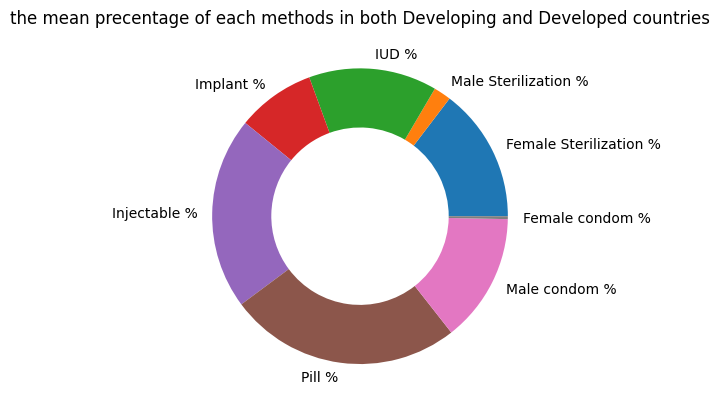

In [235]:
#ploting the mean of each columns in a donut chart
columns_means.plot(kind='pie', title= 'the mean precentage of each methods in both Developing and Developed countries', wedgeprops=dict(width=0.4))

.

Making two new data frames sorted by "developing" and "developed" countries based on "merged_clean_df", In order to find out which method is more popular in developing and developed countries.

In [236]:
#using the astype method for making the new data frames
merged_clean_df = merged_clean_df.astype({"Country":str,"Any method %":float,
                                          "Any modern method %":float,"Female Sterilization %":float,"Male Sterilization %":float,
                                          "IUD %":float,"Implant %":float,"Injectable %":float,"Pill %":float,"Male condom %":float,
                                          "Female condom %":float})

In [237]:
merged_clean_df.dtypes

Country                    object
Survey Start Year           int64
Survey End Year             int64
Any method %              float64
Any modern method %       float64
Female Sterilization %    float64
Male Sterilization %      float64
IUD %                     float64
Implant %                 float64
Injectable %              float64
Pill %                    float64
Male condom %             float64
Female condom %           float64
Development                object
dtype: object

In [238]:
#extract and make new df based on developing countries
developing_df = merged_clean_df[merged_clean_df["Development"]=="Developing"]

In [239]:
developing_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46.0,3.7,1.0,0.0,0.3,0.0,0.2,0.6,1.4,0.0,Developing
25,Angola,2001,2001,6.3,4.9,0.1,0.0,0.4,0.0,1.4,2.2,0.3,0.1,Developing
74,Bangladesh,2019,2019,62.7,59.1,3.3,0.5,0.7,1.6,12.5,34.3,6.0,0.0,Developing
117,Belize,2015,2016,51.4,48.5,17.4,0.1,1.5,3.3,10.1,10.9,4.8,0.3,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Uzbekistan,2021,2022,58.8,56.4,7.5,0.0,42.9,0.0,1.4,1.5,2.4,0.0,Developing
772,Vanuatu,2007,2007,38.4,37.0,5.8,0.3,2.5,0.2,10.6,15.7,1.1,0.2,Developing
1017,Viet Nam,2020,2021,72.8,59.8,1.6,0.0,23.7,0.3,2.0,16.0,15.3,0.7,Developing
1236,Zambia,1999,1999,22.0,18.5,0.4,0.2,0.5,0.2,2.5,12.6,1.2,0.0,Developing


In order to be able to make a bar chart for comparing contraception methods in "developing" and "developed" countries , I made a list of methods cathegories, with average value of each method in "developing" and "developed" countries

In [240]:
#making the list of developing countries
developing_list= []
methods_cat=["Female Sterilization %", "Male Sterilization %", "IUD %",
            "Implant %", "Injectable %", "Pill %", "Male condom %", "Female condom %"]

for method in methods_cat:
    mean_developing=developing_df[method].mean()
    developing_list.append(mean_developing)

In [241]:
developing_list

[np.float64(4.446875),
 np.float64(0.3859375),
 np.float64(5.176562500000001),
 np.float64(4.171875),
 np.float64(9.4453125),
 np.float64(7.16875),
 np.float64(3.6281250000000003),
 np.float64(0.10156250000000003)]

In [242]:
#extract and make new df based on developed
developed_df = merged_clean_df.loc[merged_clean_df["Development"]=="Developed", :]

In [243]:
developed_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0.0,39.0,2.1,0.0,Developed
38,Argentina,2019,2020,70.1,68.2,15.7,0.2,7.5,2.9,4.1,23.2,12.4,0.4,Developed
41,Australia,2001,2002,70.8,70.8,15.9,13.7,0.8,0.8,1.1,23.8,15.2,0.1,Developed
83,Barbados,2012,2012,59.2,55.4,4.7,0.1,3.1,0.8,5.0,21.2,19.5,0.5,Developed
141,Belarus,2012,2012,63.1,52.0,3.2,0.0,15.1,0.1,0.1,10.3,22.3,0.1,Developed
105,Botswana,2000,2000,44.4,42.1,1.2,0.2,1.7,0.4,8.1,14.3,15.5,0.5,Developed
111,Brazil,2013,2013,80.2,77.7,21.4,4.2,2.0,0.1,5.3,34.2,10.3,0.1,Developed
247,Costa Rica,2018,2018,70.9,69.0,21.9,5.2,3.4,0.5,9.7,21.4,6.8,0.1,Developed
298,Equatorial Guinea,2000,2000,10.1,6.5,0.5,0.1,0.7,0.1,2.3,1.5,0.4,0.2,Developed
508,Iraq,2018,2018,52.8,36.1,3.0,0.1,8.8,0.2,3.9,16.0,3.2,0.1,Developed


In [244]:
#making the list of developed countries
developed_list= []
methods_cat=["Female Sterilization %", "Male Sterilization %", "IUD %",
            "Implant %", "Injectable %", "Pill %", "Male condom %", "Female condom %"]

for method in methods_cat:
    mean_developed=developed_df[method].mean()
    developed_list.append(mean_developed)

In [245]:
developed_list

[np.float64(8.361538461538462),
 np.float64(1.557692307692308),
 np.float64(5.75),
 np.float64(1.0115384615384615),
 np.float64(4.480769230769231),
 np.float64(15.865384615384613),
 np.float64(9.642307692307693),
 np.float64(0.16923076923076924)]

Making charts for visualization and comparison

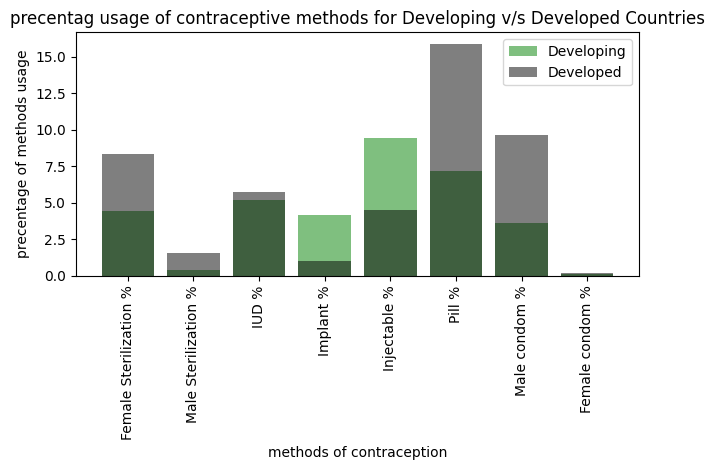

In [246]:
plt.bar(methods_cat, developing_list, label='Developing', color='green', alpha=0.5, align='center')
plt.bar(methods_cat, developed_list, label='Developed', color='black', alpha=0.5, align='center')
plt.xlabel('methods of contraception')
plt.ylabel('precentage of methods usage')
plt.title('precentag usage of contraceptive methods for Developing v/s Developed Countries')
plt.xticks(rotation= 90)

plt.legend()
plt.tight_layout()
plt.show()

calculating mean of each method in both developing and developed countries df

In [247]:
#Regrouping the data by methods to calculating the average of the developed countries
developed_df=developed_df[["Female Sterilization %", "Male Sterilization %", "IUD %",
                                          "Implant %", "Injectable %",	"Pill %", "Male condom %", "Female condom %", "Development"]]
developed_df=developed_df.groupby(["Development"]).mean().unstack()


In [248]:
developed_df

                        Development
Female Sterilization %  Developed       8.361538
Male Sterilization %    Developed       1.557692
IUD %                   Developed       5.750000
Implant %               Developed       1.011538
Injectable %            Developed       4.480769
Pill %                  Developed      15.865385
Male condom %           Developed       9.642308
Female condom %         Developed       0.169231
dtype: float64

In [249]:
#Regrouping the data by methods to calculating the average of the developing countries
developing_df=developing_df[["Female Sterilization %", "Male Sterilization %", "IUD %",
                                          "Implant %", "Injectable %",	"Pill %", "Male condom %", "Female condom %", "Development"]]
developing_df=developing_df.groupby(["Development"]).mean().unstack()

In [250]:
developing_df

                        Development
Female Sterilization %  Developing     4.446875
Male Sterilization %    Developing     0.385937
IUD %                   Developing     5.176563
Implant %               Developing     4.171875
Injectable %            Developing     9.445312
Pill %                  Developing     7.168750
Male condom %           Developing     3.628125
Female condom %         Developing     0.101562
dtype: float64

Concolusion:

hypothesis:
Null Hypothesis (H0): There is no significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.
Alternative Hypothesis (H1): There is a significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.

Regarding to the tests that have been done like ANOVA the is and F-statistic: 22.05155597911754 the is P-value: 4.630506206795897e-27 which we can have these resultes: 

*F-statistic of 22.05 suggests that there is a strong likelihood that at least one of the group means is significantly different from the others. 
*p-value of 4.630506206795897e-27 is much smaller than the standard significance levels of 0.05 or 0.01. This means that there is an extremely small probability (practically negligible) that the observed result occurred by chance under the assumption that the null hypothesis is true. In other words, we can confidently reject the null hypothesis and conclude that there is a statistically significant difference between the means of the groups being compared.

As we can see in the bar chart and also the numerical value of the means for each methods in developing and developed countries, we can conclude that the Pill with average usage of 15.86% is the most common contraceptive method in developed countries, on the other hand in the developing countries Injectable method with average usage of 9.44% is the most common one.


# Question 3: How do ages of conception differ in developed vs developing countries? (Vidushi)

In [251]:
#Reading all data files
age_df=pd.read_csv('data/fertility_clean.csv')

dev_data=pd.read_csv('data/gdp_clean.csv')


In [252]:
#Merging the two dataframes
merged_df=pd.merge(age_df,dev_data, on="Country")
age_clean_df=merged_df.copy()

In [253]:
#Displaying the dataframe
age_clean_df

,Country,ISO code,Period,Reference,Total fertility,Age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Mean age at childbearing,Year,Value,Development
0,Afghanistan,4.0,Around 1970,1973,8.21,168,359,355,307,235,137,81,30,2012,1958.447627,Developing
1,Afghanistan,4.0,..,1979,7.11,105,260,309,301,262,185,..,30.7,2012,1958.447627,Developing
2,Afghanistan,4.0,Around 2005,2003,7.52,146,333,350,289,217,143,..,30.1,2012,1958.447627,Developing
3,Afghanistan,4.0,Latest,2009,5.11,80,257,262,209,128,60,26,29.1,2012,1958.447627,Developing
4,Albania,8.0,Around 1970,1970,5.16,39,275,266,214,146,69,22,29.7,2012,10526.250106,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,Zimbabwe,716.0,Around 1970,1969,6.74,79,272,304,257,218,145,73,31.2,2012,2349.028207,Developing
793,Zimbabwe,716.0,Around 1985,1987,5.42,102,251,250,212,158,80,32,29.5,2012,2349.028207,Developing
794,Zimbabwe,716.0,Around 1995,1998,3.98,112,199,180,135,108,46,15,28.3,2012,2349.028207,Developing
795,Zimbabwe,716.0,Around 2005,2004,3.8,99,205,172,144,86,42,13,28.1,2012,2349.028207,Developing


DATA EXPLORATION
-The data above is obtained from the United Nations World Fertility Data 2012 which shows Age-specific fertility rates and Total fertility rate. This data was collected mainly by survery, census or registration. The data was partly cleaned by Aidan and the data above shows how it looks after merging.

-The age groups have been broken into 7 groups 7 age groups namely:  15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49. 

-The value of the Age-specific fertility rates (ASFRs) have been measured per 1,000 women in the age intervals. Each age group has an age interval of 5.

-The total fertility rate is calculated by adding all ASFRs for a particular country (row) and then multiplying by 0.005 (age interval/1000).

-Data cleaning part will delete all redundant columns and rows.

-Since we have more than one row of data for a particular country, only the row with the most recent year data will be kept.

DATA CLEANING
-This part involves removing all redundant rows and columns.

-Dropping all rows with NaN values

-Renaming columns suitably.

-Converting into proper data type for each column to perform aggregation.

-Keeping the most recent data if we have more than one complete row of data for a specific country.

-Calculating age specific fertility rate as we have only value per 1000 in 5 year interval.

In [254]:
#Deleting all redundant columns
age_clean_df = age_clean_df.drop(columns=["ISO code", "Period","Mean age at childbearing ","Value", "Year"])

# Renaming columns appropriately
age_clean_df=age_clean_df.rename(columns={"Age: 15-19": "Fertility at age: 15-19", "Total fertility": "Total fertility rate"})
age_clean_df.head()

,Country,Reference,Total fertility rate,Fertility at age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Development
0,Afghanistan,1973,8.21,168,359,355,307,235,137,81,Developing
1,Afghanistan,1979,7.11,105,260,309,301,262,185,..,Developing
2,Afghanistan,2003,7.52,146,333,350,289,217,143,..,Developing
3,Afghanistan,2009,5.11,80,257,262,209,128,60,26,Developing
4,Albania,1970,5.16,39,275,266,214,146,69,22,Developing


In [255]:
#Cleaning the data for fertility columns for different age groups. Deleting rows containing .. as their values
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 15-19"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 20-24"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 25-29"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 30-34"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 35-39"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 40-44"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 45-49"]!="..",:]

In [256]:
#Deleting any rows with NaN values using dropna
age_clean_df=age_clean_df.dropna(how="any")

In [257]:
#Converting the coloumns values for fertility into float
age_clean_df=age_clean_df.astype({"Reference ": int, "Total fertility rate":float, "Fertility at age: 15-19":float,"Fertility at age: 20-24":float, "Fertility at age: 25-29":float, "Fertility at age: 30-34":float,
                                  "Fertility at age: 35-39":float, "Fertility at age: 40-44":float, "Fertility at age: 45-49":float})

In [258]:
#Removing rows with outdated data for unique countries by first sorting the country and year in descending order and then dropping duplicates for country, keeping first row.

age_clean_df = age_clean_df.sort_values(by=["Country", "Reference "], ascending=[True, False])
age_clean_df = age_clean_df.drop_duplicates(subset="Country", keep="first")
 

In [259]:
#Deleting Reference column to have just fertility data
age_clean_df = age_clean_df.drop(columns=["Reference "])

In [260]:
#Calculating fertility rates for each country since Age Specific Fertility Rates are measured per 1000 women in 5 year age intervals
age_clean_df["Fertility rate at age: 15-19"]=age_clean_df["Fertility at age: 15-19"]*5/1000
age_clean_df["Fertility rate at age: 20-24"]=age_clean_df["Fertility at age: 20-24"]*5/1000
age_clean_df["Fertility rate at age: 25-29"]=age_clean_df["Fertility at age: 25-29"]*5/1000
age_clean_df["Fertility rate at age: 30-34"]=age_clean_df["Fertility at age: 30-34"]*5/1000
age_clean_df["Fertility rate at age: 35-39"]=age_clean_df["Fertility at age: 35-39"]*5/1000
age_clean_df["Fertility rate at age: 40-44"]=age_clean_df["Fertility at age: 40-44"]*5/1000
age_clean_df["Fertility rate at age: 45-49"]=age_clean_df["Fertility at age: 45-49"]*5/1000
age_clean_df.head()

,Country,Total fertility rate,Fertility at age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Development,Fertility rate at age: 15-19,Fertility rate at age: 20-24,Fertility rate at age: 25-29,Fertility rate at age: 30-34,Fertility rate at age: 35-39,Fertility rate at age: 40-44,Fertility rate at age: 45-49
3,Afghanistan,5.11,80.0,257.0,262.0,209.0,128.0,60.0,26.0,Developing,0.400,1.285,1.310,1.045,0.640,0.300,0.130
8,Albania,1.33,11.0,70.0,92.0,61.0,25.0,5.0,1.0,Developing,0.055,0.350,0.460,0.305,0.125,0.025,0.005
13,Algeria,2.74,9.0,75.0,139.0,149.0,118.0,51.0,8.0,Developed,0.045,0.375,0.695,0.745,0.590,0.255,0.040
18,Angola,5.80,166.0,244.0,272.0,231.0,164.0,68.0,16.0,Developing,0.830,1.220,1.360,1.155,0.820,0.340,0.080
23,Antigua and Barbuda,2.01,67.0,94.0,88.0,79.0,56.0,19.0,1.0,Developed,0.335,0.470,0.440,0.395,0.280,0.095,0.005


ANALYSIS
-At this point, the data has already been cleaned and we can proceed with analysis

In [261]:
#Overview of number of developing and developed countries in my analysis
country_count=len(age_clean_df["Country"])

developed_country = age_clean_df.loc[age_clean_df["Development"]=="Developed", "Country"]
developed_country_count=len(developed_country)

developing_country = age_clean_df.loc[age_clean_df["Development"]=="Developing", "Country"]
developing_country_count=len(developing_country)

print(f"This analysis is done on {country_count} countries out of which {developed_country_count} are developed countries and {developing_country_count} are developing countries")

This analysis is done on 166 countries out of which 78 are developed countries and 88 are developing countries


INVESTIGATING THE RELATIONSHIP BETWEEN AGE GROUPS AND FERTILITY RATES FOR DEVELOPING AND DEVELOPED COUNTRIES

------HYPOTHESIS TESTING-------

Null Hypothesis: There is no correlation between mean age range and mean fertility rate

Alternate Hypothesis: There is a correlation between mean age range and mean fertility rate

Significance level: 0.05

Test used: Pearson's correlation

Visualisation: CREATING A SCATTER PLOT TO DETERMINE THE CORRELATION BETWEEN THE MEAN FERTILITY RATE AND THE AGE GROUP FOR DEVELOPED AND DEVELOPING COUNTRIES

-This is will carried out by calculating middle value of each age range.
-For each age group, the average fertility rate will be computed for developing and developed countries

In [262]:
#Separating developed and developing countries data into separate dataframes
developed_fertility_rate=age_clean_df[age_clean_df["Development"]=="Developed"]
developing_fertility_rate=age_clean_df[age_clean_df["Development"]=="Developing"]

#Finding y values for scatter plot by calculating mean of fertility rate for each age group for developing and developed countries

age_groups = ["Fertility rate at age: 15-19", "Fertility rate at age: 20-24","Fertility rate at age: 25-29", "Fertility rate at age: 30-34",
    "Fertility rate at age: 35-39", "Fertility rate at age: 40-44","Fertility rate at age: 45-49"]

age_groups_label=['15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49']

mean_fertility_rate_developed=[]
mean_fertility_rate_developing=[]

for i in range(len(age_groups)):
    mean_val_developed=developed_fertility_rate[age_groups[i]].mean()
    mean_val_developing=developing_fertility_rate[age_groups[i]].mean()
    mean_fertility_rate_developed.append(mean_val_developed)
    mean_fertility_rate_developing.append(mean_val_developing)

#Finding x values for scatter plot by calculating mean of each age range

x_values_scatter=[(15+19)/2,  (20+24)/2, (25+29)/2, (30+34)/2, (35+39)/2, (40+44)/2, (45+49)/2]
x_values_scatter = np.array(x_values_scatter)



In [263]:
#Using Pearson correlation coefficient
(r_developing,p_developing)=st.pearsonr(x_values_scatter,mean_fertility_rate_developing)
(r_developed,p_developed)=st.pearsonr(x_values_scatter,mean_fertility_rate_developed)

print(f"r_developing:  {r_developing}")
print(f"r_developed:  {r_developed}")
print(f"p_developing:  {p_developing}")
print(f"p_developed:  {p_developed}")


print(f"The r^2-value for developing countries is {(r_developing*r_developing)}")
print(f"The r^2-value for developed countries is {(r_developed*r_developed)}")

r_developing:  -0.6129163954302652
r_developed:  -0.4852358839393617
p_developing:  0.14335488911907285
p_developed:  0.26968852267741816
The r^2-value for developing countries is 0.3756665077872292
The r^2-value for developed countries is 0.23545386306241367


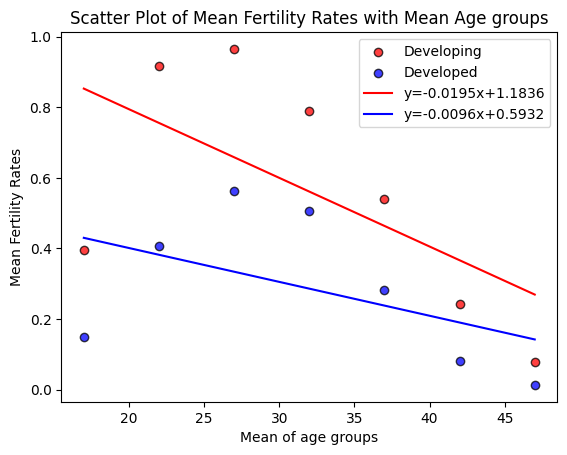

In [264]:
#Creating scatter plot and line of regression

plt.scatter(x_values_scatter, mean_fertility_rate_developing, marker='o', label="Developing", alpha=0.75, facecolor="red", edgecolor="black")
plt.scatter(x_values_scatter, mean_fertility_rate_developed, marker='o', label="Developed", alpha=0.75, facecolor="blue", edgecolor="black")

# Perform linear regression
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values_scatter, mean_fertility_rate_developing)
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values_scatter, mean_fertility_rate_developed)

# Calculate regression values
regress_values_developing = (x_values_scatter * slope1) + intercept1
regress_values_developed = (x_values_scatter * slope2) + intercept2

# Prepare the equation strings for the regression lines
line_eq1 = "y=" + str(round(slope1, 4)) + "x+" + str(round(intercept1, 4))
line_eq2 = "y=" + str(round(slope2, 4)) + "x+" + str(round(intercept2, 4))

# Plot regression lines
plt.plot(x_values_scatter, regress_values_developing, "r-", label=line_eq1)  # Red line for developing
plt.plot(x_values_scatter, regress_values_developed, "b-", label=line_eq2)     # Blue line for developed

# Adding labels and legend
plt.xlabel('Mean of age groups')
plt.ylabel('Mean Fertility Rates')
plt.legend()
plt.title('Scatter Plot of Mean Fertility Rates with Mean Age groups')
plt.show()


SUMMARY OF ANALYSIS FROM HYPOTHESIS TESTING:

For developing countries:

The r value is -0.613, it indicates a negative correlation between the age groups and fertility rates. 
p value is 0.143 which is greater than 0.05. Hence, fail to reject null hypothesis. There is not enough evidence to support that there is a significant relationship betwwen age group and fertility rates


For developed countries:

The r value is -0.485, which also indicates a negative correlation between the age groups and fertility rates. 
p value is 0.270 which is also greater than 0.05. Hence, fail to reject null hypothesis. There is not enough evidence to support that there is a significant relationship betwwen age group and fertility rates

The scatter plot also suggests that there is a correlation as reflected by the line of regression. However, the way the points are scattered is in itself proof that we cannot detetct any significant relationship. These are in line with our statistical analysis.

INVESTIGATING THE VARIATION IN FERTILITY RATES FOR DEVELOPING AMND DEVELOPED COUNTRIES FOR EACH AGE GROUP. Is there any significant difference between mean fertility rates for developing and developed countries?

------HYPOTHESIS TESTING-------

Null Hypothesis: There is a difference between the means of fertility rates for developing and developed countries

Alternate Hypothesis(one-tailed, right-tailed): The means of fertility rates is greater for developing countries than developed countries

Significance level: 0.05

Test used: Independent sample t-Test

Visualisation: CREATING A STACKED (OVERLAYED) BARCHART TO DETERMINE IF THERE IS A SIGNIFICANT DIFFERENCE OR NOT.

-This is will carried out by calculating middle value of each age range.
-For each age group, the average fertility rate will be computed for developing and developed countries

In [265]:
#Performing t test
for i in age_groups:
    fertility_rate_ttest_developing=developing_fertility_rate[i]
    fertility_rate_ttest_developed=developed_fertility_rate[i]
    t_statistic, p_value = st.ttest_ind(fertility_rate_ttest_developing, fertility_rate_ttest_developed, equal_var=False)
    print(f"t_statistic_{i}: {t_statistic} and p_value{i}: {p_value}")


t_statistic_Fertility rate at age: 15-19: 8.014916535418696 and p_valueFertility rate at age: 15-19: 3.551038816873083e-13
t_statistic_Fertility rate at age: 20-24: 12.573439943092232 and p_valueFertility rate at age: 20-24: 1.5293070220316422e-25
t_statistic_Fertility rate at age: 25-29: 10.154202351564242 and p_valueFertility rate at age: 25-29: 9.455405321925898e-19
t_statistic_Fertility rate at age: 30-34: 7.5367139387770345 and p_valueFertility rate at age: 30-34: 7.35713237330617e-12
t_statistic_Fertility rate at age: 35-39: 7.725840832587406 and p_valueFertility rate at age: 35-39: 2.6398286868119107e-12
t_statistic_Fertility rate at age: 40-44: 8.369553226125872 and p_valueFertility rate at age: 40-44: 7.261375144268903e-14
t_statistic_Fertility rate at age: 45-49: 7.405857468989814 and p_valueFertility rate at age: 45-49: 1.6565701511866937e-11


In [266]:
#Converting two tailed p value to one tailed p value
#Since all t_statistics are positive, we need to divide p by 2.
for i in age_groups:
    fertility_rate_ttest_developing=developing_fertility_rate[i]
    fertility_rate_ttest_developed=developed_fertility_rate[i]
    t_statistic, p_value = st.ttest_ind(fertility_rate_ttest_developing, fertility_rate_ttest_developed, equal_var=False)
    p_value=(p_value/2)
    print(f"t_statistic_{i}: {t_statistic} and p_value{i}: {p_value}")

t_statistic_Fertility rate at age: 15-19: 8.014916535418696 and p_valueFertility rate at age: 15-19: 1.7755194084365414e-13
t_statistic_Fertility rate at age: 20-24: 12.573439943092232 and p_valueFertility rate at age: 20-24: 7.646535110158211e-26
t_statistic_Fertility rate at age: 25-29: 10.154202351564242 and p_valueFertility rate at age: 25-29: 4.727702660962949e-19
t_statistic_Fertility rate at age: 30-34: 7.5367139387770345 and p_valueFertility rate at age: 30-34: 3.678566186653085e-12
t_statistic_Fertility rate at age: 35-39: 7.725840832587406 and p_valueFertility rate at age: 35-39: 1.3199143434059553e-12
t_statistic_Fertility rate at age: 40-44: 8.369553226125872 and p_valueFertility rate at age: 40-44: 3.6306875721344515e-14
t_statistic_Fertility rate at age: 45-49: 7.405857468989814 and p_valueFertility rate at age: 45-49: 8.282850755933469e-12


SUMMARY OF ANALYSIS OF T TEST:

To convert the two tailed p value to one tailed, 

All p_values for different age groups are considerably less than the designated significance level of 0.05. Hence for all age groups, we reject the null hypothesis.This means that we have strong evidence that the means of fertility rates is greater for developing countries than developed countries

PLOTTING A STACKED BARCHART(OVERLAYED) TO SHOW THE FERTILITY RATE FOR DIFFERENT AGE GROUPS FOR DEVELOPING AND DEVELOPED COUNTRIES

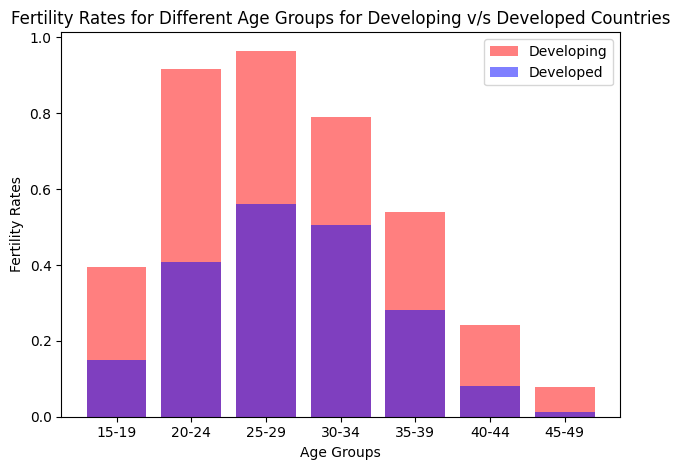

In [267]:

#Calculating the mean of the age group
developed_fertility_rate_mean = developed_fertility_rate[age_groups].mean()
developing_fertility_rate_mean = developing_fertility_rate[age_groups].mean()


plt.bar(age_groups, developing_fertility_rate_mean, label='Developing', color='red', alpha=0.5, align='center')
plt.bar(age_groups, developed_fertility_rate_mean, label='Developed', color='blue', alpha=0.5, align='center')

plt.xlabel('Age Groups')
plt.ylabel('Fertility Rates')
plt.title('Fertility Rates for Different Age Groups for Developing v/s Developed Countries')
age_group_label=['15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49']
plt.xticks(age_groups,age_group_label , rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

SUMMARY OF ANALYSIS OF THE BARCHART

The barchart graph above is a stacked barchart(overlayed) and this clearly demonstrates that the average value of fertility rates is higher for developing countries as compared to developed countries for all the age groups. The height of the bars for developing countries is almost twice that of developed countries. This behaviour can be explained due to many reasons:
-Lack of resources and hence limited access to contraceptive methods in developing countries, resulting in higher fertility rates
-Better education services in developed countries resulting in women prioritizing their careers over family planning
-Cultural beliefs in developing countries assigns 

The bar chart is line with our statistical analysis.

This also shows that age range 25-29 has the highest fertility rate among all age groups for both developed and developing countries.